<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a): William Henrique A. Martins

# Experimento 06: Redes Neurais Artificiais

In [1]:
import os                                             # Operational System para manipulação de arquivos.
import cv2                                            # OpenCV para manipulação de imagens.
import numpy as np                                    # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt                       # Pyplot para plotagem de gráficos e imagens.
from sklearn.model_selection import train_test_split  # Função para particionamento dos dados

from tensorflow.keras.models import Sequential        # Classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.layers import Dense, Input      # Camada de neurônios densamente conectados.
from tensorflow.keras.optimizers import SGD           # Otimizador "Descida do Gradiente com Momento".
from tensorflow.keras.datasets import boston_housing  # Dataset utilizado nesse experimento.

## 1. Banco de Dados

* Vamos utilizar um banco de dados do catálogo de datasets do Keras, que é disponibilizado como uma função pronta;

* Cada instância do banco de dados corresponde a um conjunto de 13 valores referentes a características de subúrbios de Boston na década de 1970, a exemplo de taxa de crimes, imposto sobre propriedade, etc;

* Esses valores serão utilizados para calcular o valor mediano das residências no respectivo subúrbio em um problema de regressão, de modo que iremos mapear um vetor de entrada com 13 valores em um vetor de saída com 1 único elemento;

* O banco de dados contém 506 valores divididos em 404 instâncias de treino e 102 de teste;

* Uma descrição mais detalhada dos valores de entrada pode ser vista em http://lib.stat.cmu.edu/datasets/boston, onde os valores são descritos na ordem que aparecem;

### 1.1 Organização do banco de dados

* Comumente os dados utilizados no treinamento de modelos de inteligência artificial reservam a primeira dimensão para controlar a amostra e espalham o tipo de dado utilizado nas demais dimensões do tensor. 


* Nesse caso, os nossos dados são vetores de características unidimensionais (1D), de modo que são organizados em tensores bidimensionais (2D) com formato: **dados.shape = (amostras, características)**
    * O i-ésimo exemplo pode ser acessado a partir de: **exemplo = dados[i]**
    * A j-ésima característica dos exemplos pode ser acessada a partir de: **caracteristica = dados[:, j]**
    * Porções do tensor podem ser acessadas utilizando fatiamento, por exemplo:
        * primeiros_5_exemplos = dados[:5]
        * caracteristicas_9a13 = dados[8:13]
        

* Lembrem-se que a contagem de índices em Python começa em 0 e só é inclusiva no primeiro elemento:
    * **:5** produz os índices **0, 1, 2, 3, 4** 
    * **8:13** produz os índices **8, 9, 10, 11, 12** 
        

* O banco de dados pode ser carregado utilizando:
    * **(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()**
    * train_data é um tensor com as entradas do conjunto de treino;
    * test_data é um tensor com as entradas do conjunto de teste;
    * train_targets é um tensor com os gabaritos do conjunto de treino;
    * test_targets é um tensor com os gabaritos do conjunto de teste;

**a. O código abaixo carrega o banco de dados, acesse alguns exemplos de treinamento e de teste e veja suas dimensões.**

* Use índices entre **[0, 404)** para os dados de treino e entre **[0, 102)** para os de teste.

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


**b. Verifique as dimensões e as faixas de valores de cada característica nos vetores de entrada dos conjuntos de treino e de teste. A faixa de valores das características são semelhantes? E os dados de treino e de teste?**

* Encontre os valores mínimo/máximo além da média (np.mean) e da variância (np.var) de cada uma das 13 características.
* Sugestão: leia sobre o parâmetro "axis" na documentação das funções np.min, np.max e np.mean.

In [3]:
train_data.shape
# 404 instâncias
# 13 caractéristicas
test_data.shape
# 102 instâncias
# 13 caractéristicas

print('nº de caratéristicas: \n\t Train data: {} \n\t Test Data: {} '.format(train_data.shape[1], test_data.shape[1]))


min = np.min(train_data, axis = 0)
max = np.max(train_data, axis = 0)
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)
print('\nCONJUNTO DE TREINO\n')
for i in range(0, test_data.shape[1]): 
  print('{} - Limite: [{:.2f},{:.2f}], com Média {:.2f} e Variância {:.2f}'.format(f'caractéristica {i}', min[i], max[i], mean[i], std[i]))


min = np.min(test_data, axis = 0)
max = np.max(test_data, axis = 0)
mean = np.mean(test_data, axis = 0)
std = np.std(test_data, axis = 0)
print('\nCONJUNTO DE TESTE')
for i in range(0, test_data.shape[1]): 
  print('{} - Limite: [{:.2f},{:.2f}], com Média {:.2f} e Variância {:.2f}'.format(f'caractéristica {i}', min[i], max[i], mean[i], std[i]))

nº de caratéristicas: 
	 Train data: 13 
	 Test Data: 13 

CONJUNTO DE TREINO

caractéristica 0 - Limite: [0.01,88.98], com Média 3.75 e Variância 9.23
caractéristica 1 - Limite: [0.00,100.00], com Média 11.48 e Variância 23.74
caractéristica 2 - Limite: [0.46,27.74], com Média 11.10 e Variância 6.80
caractéristica 3 - Limite: [0.00,1.00], com Média 0.06 e Variância 0.24
caractéristica 4 - Limite: [0.39,0.87], com Média 0.56 e Variância 0.12
caractéristica 5 - Limite: [3.56,8.72], com Média 6.27 e Variância 0.71
caractéristica 6 - Limite: [2.90,100.00], com Média 69.01 e Variância 27.91
caractéristica 7 - Limite: [1.13,10.71], com Média 3.74 e Variância 2.03
caractéristica 8 - Limite: [1.00,24.00], com Média 9.44 e Variância 8.69
caractéristica 9 - Limite: [188.00,711.00], com Média 405.90 e Variância 166.17
caractéristica 10 - Limite: [12.60,22.00], com Média 18.48 e Variância 2.20
caractéristica 11 - Limite: [0.32,396.90], com Média 354.78 e Variância 93.99
caractéristica 12 - Limite

<font color=yellow>
Os conjuntos são divididos randomicamente, mas percebe-se uma certa concordancia entre os dados dos conjuntos de treino  e teste. Ou seja, as faixas de valores distoa um pouco para algumas caractéristicas, mas possuem outros parâmentros concordantes.
</font>

In [4]:

min = np.min(train_targets)
print(min)

5.0


**c. Verifique as dimensões e as faixas de valores dos gabaritos dos conjuntos de treino e de teste. Os valores encontrados são semelhantes?**

In [5]:
print('nº de caratéristicas: \n\t Train data: {} \n\t Test Data: {} '.format(len(train_targets), len(test_targets)))

min = np.min(train_targets, axis = 0)
max = np.max(train_targets, axis = 0)
mean = np.mean(train_targets, axis = 0)
std = np.std(train_targets, axis = 0)
print('\nGABARITO DE TREINO\n')
print('{} - Limite: [{:.2f},{:.2f}], com Média {:.2f} e Variância {:.2f}'.format('train_targets', min, max, mean, std))


min = np.min(test_targets, axis = 0)
max = np.max(test_targets, axis = 0)
mean = np.mean(test_targets, axis = 0)
std = np.std(test_targets, axis = 0)
print('\GABARITO DE TESTE')
print('{} - Limite: [{:.2f},{:.2f}], com Média {:.2f} e Variância {:.2f}'.format('test_targets', min, max, mean, std))

nº de caratéristicas: 
	 Train data: 404 
	 Test Data: 102 

GABARITO DE TREINO

train_targets - Limite: [5.00,50.00], com Média 22.40 e Variância 9.20
\GABARITO DE TESTE
test_targets - Limite: [5.60,50.00], com Média 23.08 e Variância 9.12


<font color='yellow'>
Os números de instâncias dos data target e do train data são iguais a seus respectivos conjuntos de treino
</font>

### 1.2 Pre-processamento dos dados

* Dados cujas características assumem diferentes faixas de valores muitas vezes são problemáticos para o aprendizado dos modelos e podem reduzir a velocidade de convergência ou até mesmo limitar as capacidades do modelo final.

* Nesse sentido, uma prática comum é a normalização dos dados antes do treinamento, que geralmente é feito por característica em forma da subtração da média e divisão pelo desvio padrão, o que faz com que os dados resultantes tenham média 0 e variância 1.

* Um ponto muito importante é que a normalização deve ser feita partir dos mesmos valores em todos os conjuntos, ou seja, os dados são normalizados segundo informações do conjunto de treino.

* Na prática não temos como calcular a média e variância real, mas se os dados de treino são significativos os seus valores são suficientes.

In [6]:
# Calcula a média do conjunto de treino
mean = train_data.mean(axis=0)

# Calcula o desvio padrão do conjunto de treino
std = train_data.std(axis=0)

# Normaliza os dados de treino
train_data -= mean
train_data /= std

# Normaliza os dados de teste
test_data -= mean
test_data /= std

**d. Repita o item b para os dados normalizados. O que se observa quantos aos valores de média e variância para os dados de treino e teste? Comente a sua interpretação sobre as diferenças observadas.**

In [7]:
nmean = train_data.mean(axis = 0)
nstd = train_data.std(axis = 0)

Agora vamos criar uma partição de validação a partir do conjunto de treino para realizar uma validação cruzada. Vamos utilizar a função **train_test_split**, que separa dados e os seus respectivos gabaritos segundo uma fração especificada.

In [8]:
# Fração escolhida para separar o mesmo número de instâncias do conjunto de testes
data_frac = test_data.shape[0] / train_data.shape[0]

# Criação do conjunto de validação
train_data, val_data, train_targets, val_targets = train_test_split(train_data,             # Dados de treino
                                                                    train_targets,          # Gabaritos de treino
                                                                    test_size = data_frac,  # Proporção de dados p/ validação
                                                                    random_state=42)        # Semente para garantir consistencia nos resultados

print("treino:", train_data.shape, train_targets.shape)
print("validação:", val_data.shape, val_targets.shape)

treino: (302, 13) (302,)
validação: (102, 13) (102,)


### 1.2 Construindo o modelo

Para construir o modelo usaremos a classe **Sequential**, que possibilita a construção de modelos sequenciais de forma bastante simples.
* A construção do modelo é feita a partir do seu instanciamento como objeto da classe seguido de chamadas à função **add()** para adicionar camadas.
* Como estamos construindo apenas Redes Neurais Artificiais por enquanto, vamos utilizar apenas as camadas **Dense** e **Input**.
    * A camada Input cria a entrada da rede com **Input( shape = None )**
        * shape corresponde ao formato do tensor de entrada, no nosso caso será o número de características do nosso banco de dados (13);
    * A camada Dense pode ser chamada com **Dense( n_unidades, activation = 'linear' )**
        * n_unidades corresponde ao número de neurônios da camada;
        * activation corresponde à função de ativação utilizada na camada;
* Algumas funções de ativação disponíveis são:
    * "linear"
    * "relu"
    * "sigmoid"
    * "softmax"
    * "tanh"


* Mais informações sobre a camada dense podem ser vistas em **https://keras.io/api/layers/core_layers/dense/**
* Mais informações sobre as ativações disponíveis podem ser vistas em **https://keras.io/api/layers/activations/**

**e. A função abaixo constroi um modelo de rede neural e utiliza a função summary() para apresentar um resumo das informações da rede neural produzida. Comente o que faz cada linha do código.**

* Modifique parâmetros como o número de unidades de cada camada e/ou o formato do tensor de entrada e/ou o número de saídas. 
* Explique como o número de parâmetros de cada camada é calculado.

In [9]:
def build_model( n_inputs, n_outputs ):
    rede = Sequential() # Cria um modelo sequencial 
    rede.add( Dense( 64, activation = "relu", input_shape = (n_inputs, ) ) ) # adiciona uma camada densa com a função relu com 13 entradas
    rede.add( Dense( 64, activation = "relu") ) # adiciona uma camada densa com a função relu com entradas referentes as saídas da camada anterior
    rede.add( Dense( n_outputs ) ) # adiciona uma camada densa que possuí n saídas e entradas referentes anteriores
    return rede

model = build_model( 13, 1 ) # monta o modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


**f. Nesse caso utilizamos uma saída com ativação linear. Qual seria a desvantagem de utilizar esse tipo de ativação nas demais camadas?**

<font color='yellow'>
Se utilizarmos uma função de ativação linear nas demais camadas, o no conjunto seria combinação linear da camada anterior, o que poderia ser representa como uma rede de unica camada.
</font>

Após a construção do modelo ele deve ser compilado antes que os parâmetros sejam treinados. Isso é feito utilizando a função **compile**:

* **model.compile( optimizer = opt, loss = fperdas, metrics = [] )** 
    * O optimizer é o algoritmo otimizador utilizado no lugar da descida do gradiente, o Keras oferece diversas opções;
        * Para treinar a partir da descida do gradiente utilizaremos o SGD (descida do gradiente com momento), mas setaremos esse parâmetro para 0.
        * **opt = SGD( learning_rate = taxa_de_aprendizagem, momentum = 0 )**
    * A função de perdas pode ser definida a partir do parâmetro loss, como este é um problema de regressão utilizaremos o erro médio quadrático: 
        * **loss = "mse"**
    * Podemos passar uma lista de métricas a serem computadas durante o treinamento, nesse caso utilizaremos o erro médio absoluto:
        * **metrics = ["mae"]**
        * Note que estamos passando uma lista com uma única métrica, mas outras poderiam ser adicionadas à lista.
         
         

* Algoritmos otimizadores populares são o Adam (**https://keras.io/api/optimizers/adam/**) e o RMSprop(**https://keras.io/api/optimizers/rmsprop/**)
* Mais informações sobre os otimizadores disponíveis podem ser vistas em **https://keras.io/api/optimizers/**
* Mais informações sobre as funções de perdas disponíveis podem ser vistas em **https://keras.io/api/losses/**
* Mais informações sobre as métricas disponíveis podem ser vistas em **https://keras.io/api/metrics/**



In [10]:
model = build_model( 13, 1 )
model.compile( optimizer = SGD(learning_rate=0.001, momentum=0.0), loss = "mse", metrics=["mae"] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### 1.3 Treinando o modelo

O treinamento é realizado a partir da função **fit**, que recebe dados de treino e de validação além de hiperparâmetros como o número de épocas e o tamanho dos lotes de dados (batchsize).

* **hist = model.fit( x = None, y = None, epochs = 1, batchsize = None, validation_data = None, verbose = "auto")**
    * x corresponde aos dados de treino;
    * y corresponde aos gabaritos de treino;
    * epochs corresponde ao número de épocas de treinamento;
    * batchsize corresponde ao tamanho dos lotes entregues à rede de cada vez;
    * validation_data corresponde a uma tupla ( val_data, val_targets ) com os dados de validação;
    * verbose indica como a função deve reportar os resultados:
        * 0: modo silencioso, nenhum retorno em formato de texto;
        * 1: retorno a cada época e barra de progresso;
        * 2: retorno a cada época sem barra de progresso;
    * hist é um dicionário de retorno com os valores de loss e das métricas computadas para treino e validação;

In [11]:
hist = model.fit( x = train_data, 
                  y = train_targets, 
                  epochs = 100, 
                  batch_size = 32, 
                  validation_data = ( val_data, val_targets ), 
                  verbose = 1)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 524.5849 - mae: 21.0093 - val_loss: 291.0752 - val_mae: 15.4410
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 173.6250 - mae: 10.6190 - val_loss: 73.6277 - val_mae: 6.9674
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 61.0815 - mae: 5.6440 - val_loss: 39.2404 - val_mae: 4.9275
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 40.3301 - mae: 4.5378 - val_loss: 25.9560 - val_mae: 3.8117
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 31.0991 - mae: 3.8394 - val_loss: 20.1330 - val_mae: 3.3033
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 26.4128 - mae: 3.5602 - val_loss: 18.9914 - val_mae: 3.1228
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 23.3863 - mae: 3.2375 - val_loss: 16.1864 - val_mae: 3.0027
Epoch 8/100
10/10 [==============================] - 0s 4ms/st

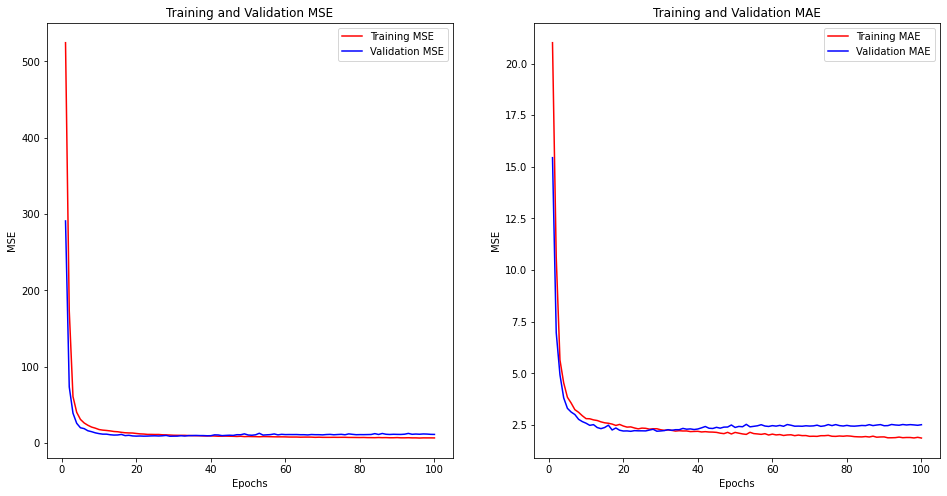

In [12]:
# Plotando os resultados obtidos
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

history_dict = hist.history

# Loss - MSE
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# Epochs
epochs = range(1, len(train_loss_values) + 1)

# Metrica - MAE
train_mae_values = history_dict["mae"]
val_mae_values = history_dict["val_mae"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training MSE")
ax.plot(epochs, val_loss_values, "b", label = "Validation MSE")
ax.set_title("Training and Validation MSE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_mae_values, "r", label="Training MAE")
ax.plot(epochs, val_mae_values, "b", label="Validation MAE")
ax.set_title("Training and Validation MAE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

**g. Comente os resultados obtidos nos gráficos acima. Houve overfitting? Se sim, o que pode ser feito para melhorar a qualidade do modelo?**

<font color='yellow'>
Com base nos gráficos, podemos observer a relação em termos do erro quadrático por epocas, percebe-se que o erro tende a diminuir(não linearmente) com o passar das epocas e ainda podemos comparar os resultados obtidos com os dados de treino e de teste. No caso ideial, desejamos que os gráficos sejam os mais próximos possíveis. Ainda de acordo com o gráfico, próximo as epocas 40 percebe-se um leve incremento das perdas, caracterizando um overfitting e podemos evitar este problema eliminando algumas informações passadas a rede

**h. Modifique hiperparâmetros do modelo como o número de camadas, as funções de ativação, o número de épocas realizas e o tamanho dos lotes. Comente os resultados obtidos a partir das mudanças realizadas.**

<font color='yellow'>
Observe que modifiquei os hiperâmetros nos blocos anteriores
</font>

### 1.4 Teste do modelo

O teste do modelo pode ser realizado a partir da função **evaluate**, que recebe os dados de treino e retorna o valor de loss calculado para esse conjunto e os valores de cada métrica da lista fornecida durante a compilação do modelo. 

* É uma prática comum realizar ajustes no modelo com base no conjunto de validação e só utilizar o conjunto de testes após a definição dos hiperparâmetros definitivos.
* Como os hiperparâmetros são ajustados a partir dos resultados obtidos para o conjunto de validação, o modelo pode acabar. sobreajustando aos dados de validação, então é interessante mudar os dados desse conjunto com frequência.
* Para mudar os dados de validação basta alterar a semente na função train_test_split.
* Crie um novo modelo do zero após a realização de mudanças nos conjuntos de treino/validação.

In [15]:
test_mse, test_mae = model.evaluate( test_data, test_targets)

# Observa-se que os dados de saída são normalizados em milhares de dólares, 
# então é necessário multiplicar por 1000 para obter os valores absolutos
print("Erro médio absoluto de teste: ${:.2f}".format(1000*test_mae))

4/4 [==============================] - 0s 3ms/step - loss: 20.1080 - mae: 2.7468
Erro médio absoluto de teste: $2746.80


**i. Verifique novamente a faixa de valores dos gabaritos no banco de dados. Considerando a extensão dessa faixa de valores, pode-se dizer que as predições do modelo são significativas?**

## Referências
* Chollet, Francois. Deep learning with Python. Simon and Schuster, 2017.